### Notebook to play around with CycIF data

In [1]:
# Import librarires
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt

# Create anndata and scanpy
import anndata as ad
import scanpy as sc

# Import custom functions
import wget

In [2]:
# Import data
# Laptop
#WD = "/Users/aj/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma"
# HMS
WD = "C:/Users/ajn16/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma"

os.chdir(WD)
x = pd.read_csv('Trial_data.csv', delimiter=',', index_col=0)
# Look at data
x.head()

,DAPI,CD2,TCR,CD4,DAPI.1,CD3D,CD7,CD43,DAPI.2,ALK,CD45,CD10,DAPI.3,Ki67,CD5,CD11b,DAPI.4,FOXP3,CD8,CD57
C1,2356,115,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C2,3396,0,0,0,3656,0,14,4,3195,0,10,0,3983,27,0,76,4140,9,34,0
C3,6740,13,0,0,7914,13,0,7,5810,0,6,0,7060,5,0,0,8117,9,0,0
C4,5002,2,0,0,6041,0,0,0,6421,0,5,0,5410,0,0,0,6553,0,0,0
C5,5457,0,0,0,6905,0,0,0,7927,0,0,0,6053,0,0,0,7058,0,0,0


In [3]:
# Remove all DAPI columns
cols = [c for c in x.columns if c[:4] != 'DAPI']
x1=x[cols]
# Add the first DAPI channel
x1 = pd.concat([x1, x[['DAPI']]], axis=1)

In [7]:
# Normalisation of data
file_url = 'https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/py_scripts/mi_pp_normalize.py'
exec(open(wget.download(file_url)).read())
x1 = mi_pp_normalize(x1)
x1.head()

100% [..................................................................................] 654 / 654Applying log transformation and quantile normalization...


,CD2,TCR,CD4,CD3D,CD7,CD43,ALK,CD45,CD10,Ki67,CD5,CD11b,FOXP3,CD8,CD57,DAPI
C1,2.575301,2.008719,1.958202,1.973786,1.976253,1.967054,1.985527,1.988584,0.0,1.984458,1.994599,1.938175,1.995822,1.954667,0.0,0.312099
C2,1.983059,1.981726,1.958202,1.973786,1.392263,1.967054,1.985527,1.545427,0.0,2.007415,1.994599,4.018036,1.391636,2.021628,0.0,0.790593
C3,1.724261,1.981726,1.958202,1.442310,1.976253,1.967054,1.985527,0.646965,0.0,1.984458,1.994599,1.938175,1.391636,1.954667,0.0,1.566451
C4,1.983059,1.981726,1.958202,1.973786,1.976253,1.967054,1.985527,0.000000,0.0,1.984458,1.994599,1.938175,1.995822,1.954667,0.0,1.245770
C5,1.983059,1.981726,1.958202,1.973786,1.976253,1.967054,1.985527,1.988584,0.0,1.984458,1.994599,1.938175,1.995822,1.954667,0.0,1.341858


In [8]:
# Convert to AnnData
file_url = 'https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/py_scripts/mi_pp_anndata.py'
exec(open(wget.download(file_url)).read())
adata = mi_pp_anndata (x1)
adata

100% [..................................................................................] 693 / 693Converting dataframe into anndata - Annotated Data...


AnnData object with n_obs × n_vars = 3324 × 16 
    obs: 'cells'

### Scanpy analysis

In [9]:
adata

AnnData object with n_obs × n_vars = 3324 × 16 
    obs: 'cells'

In [10]:
sc.pp.filter_cells(adata, min_genes=0)
sc.pp.filter_genes(adata, min_cells=0)
adata.obs['n_counts'] = adata.X.sum(axis=1)

Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'int32' is maintained. 
Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'int32' is maintained. 


In [11]:
sc.tl.pca(adata, svd_solver='arpack')

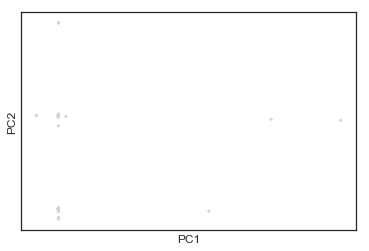

In [13]:
sc.pl.pca(adata)

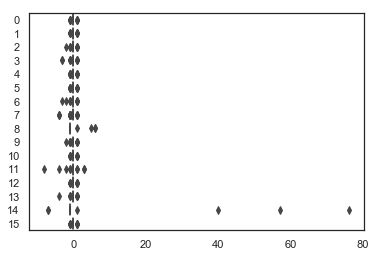

In [104]:
sns.boxplot(data= adata.X, orient="h")

In [17]:
# Preprocessing
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_genes(adata, min_cells=0)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

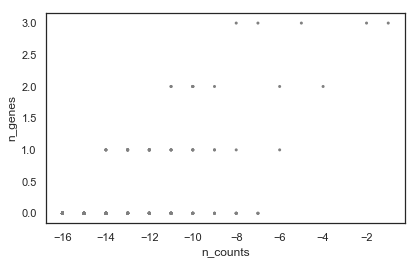

In [23]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [20]:
sc.tl.pca(adata, svd_solver='arpack')

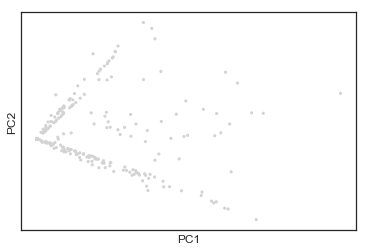

In [21]:
sc.pl.pca(adata)

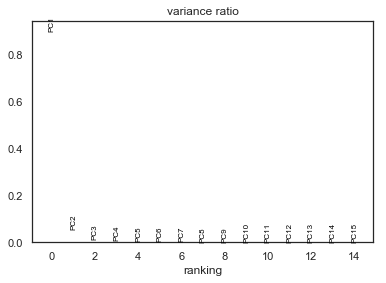

In [14]:
sc.pl.pca_variance_ratio(adata)

In [15]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=3)

In [16]:
sc.tl.umap(adata)

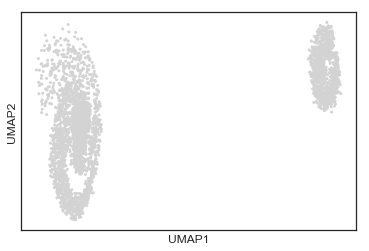

In [17]:
sc.pl.umap(adata)